# 🧠 Multi-Layer Perceptron (MLP) Classifier

This notebook shows how to apply a **Multi-Layer Perceptron (MLP)** — a simple neural network — using **scikit-learn** to predict whether a machine is **Faulty** or **Healthy** based on sensor readings.

We will:
- Train an MLP on a **synthetic dataset** (for conceptual clarity)
- Train and evaluate it on a **real predictive maintenance dataset**
- Compute accuracy, precision, recall, F1-score
- Visualize confusion matrix and ROC curve

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)

plt.style.use('seaborn-v0_8-colorblind')

## 1️⃣ Synthetic Dataset Example

In [2]:
# Synthetic machine dataset
data = {
    'vibration': [9.8, 9.2, 7.5, 8.9, 1.8, 2.5, 2.2, 2.8],
    'temperature': [105, 110, 98, 102, 65, 75, 70, 72],
    'acoustic': [78, 74, 80, 72, 42, 48, 45, 50],
    'class': ['Faulty', 'Faulty', 'Faulty', 'Faulty', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
}
df_synth = pd.DataFrame(data)
df_synth

,vibration,temperature,acoustic,class
0,9.8,105,78,Faulty
1,9.2,110,74,Faulty
2,7.5,98,80,Faulty
3,8.9,102,72,Faulty
4,1.8,65,42,Healthy
5,2.5,75,48,Healthy
6,2.2,70,45,Healthy
7,2.8,72,50,Healthy


Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000


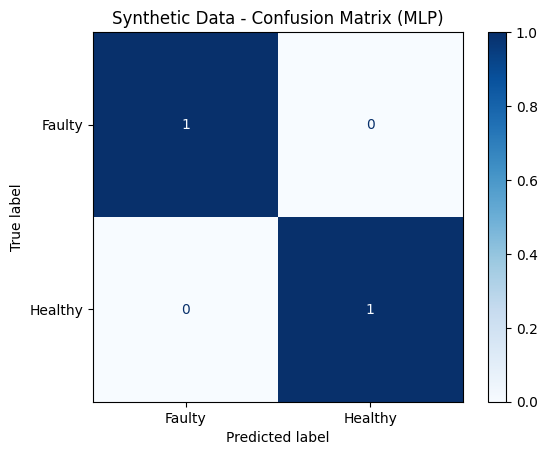

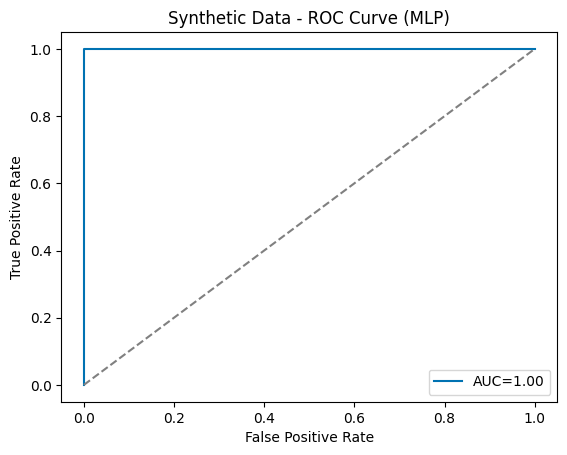

In [3]:
# Encode labels and scale features
le = LabelEncoder()
df_synth['label'] = le.fit_transform(df_synth['class'])
X = df_synth[['vibration', 'temperature', 'acoustic']]
y = df_synth['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
y_score = mlp.predict_proba(X_test)[:, 1]

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Blues')
plt.title('Synthetic Data - Confusion Matrix (MLP)')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('Synthetic Data - ROC Curve (MLP)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 2️⃣ Real Predictive Maintenance Dataset

In [4]:
# Load real dataset
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/predictive_maintenance.csv'
df_real = pd.read_csv(url)
print('Dataset shape:', df_real.shape)
df_real.head()

Dataset shape: (10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Accuracy:  0.976
Precision: 0.719
Recall:    0.482
F1-score:  0.577


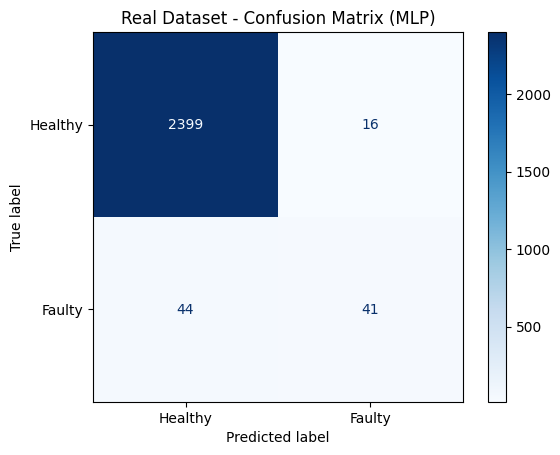

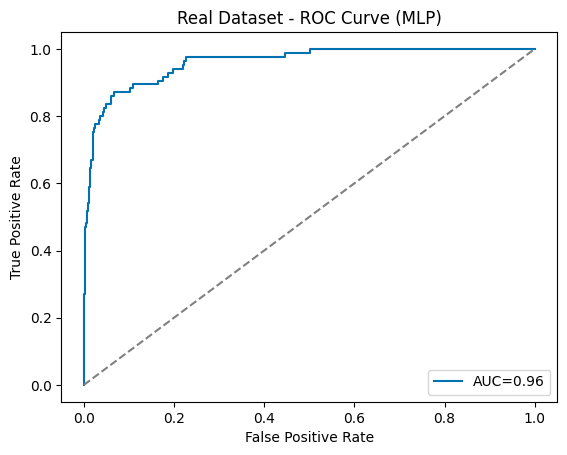

In [5]:
# Prepare data
X = df_real.drop(columns=['UDI', 'Product ID', 'Type', 'Target', 'Failure Type'])
y = df_real['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Train MLP classifier
mlp_real = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='adam', max_iter=2000, random_state=42)
mlp_real.fit(X_train, y_train)

# Predictions
y_pred = mlp_real.predict(X_test)
y_score = mlp_real.predict_proba(X_test)[:, 1]

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Healthy','Faulty']).plot(cmap='Blues')
plt.title('Real Dataset - Confusion Matrix (MLP)')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('Real Dataset - ROC Curve (MLP)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ✅ Summary
- The **MLPClassifier** can learn **non-linear patterns** in maintenance data.
- It improves over a simple Perceptron by adding **hidden layers**.
- Scaling features is critical for convergence.
- Useful for capturing complex sensor relationships in predictive maintenance.